### Dataset link:
https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data

In [46]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

In [2]:
df=pd.read_csv('data.csv')

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df['diagnosis'].unique()

array(['M', 'B'], dtype=object)

### Data Preparation

In [8]:
# Diagnosis column is output column
#Diagnosis (M = malignant, B = benign)
Y=df['diagnosis']
Y.head()

0    M
1    M
2    M
3    M
4    M
Name: diagnosis, dtype: object

In [6]:
#Dropping unecessary columns from input data, so it will reduce the time 
#for training the dataset
X=df.drop('diagnosis',axis=1)
X=X.drop(['Unnamed: 32','id'],axis=1)

In [7]:
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Splitting data into training and testing data

In [10]:
#To import train_test_split function,i used scikit learn model selection as module, beacuse in this module only
#the train_test_split function is available
from sklearn.model_selection import train_test_split

In [11]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=0)

In [12]:
#Importing KNN classifier class from neighbours module
from sklearn.neighbors import KNeighborsClassifier

### Training the model

In [42]:
#Creating lists and dictionaries to store the output
K=[]
training=[]
test=[]
scores={}

In [43]:
#"k" values are in between 2 and 15
for k in range(2,15):
#"clf" is an object and "KNeighboursClassifier" as calling function of class with arguments of "k"
    clf=KNeighborsClassifier(n_neighbors=k)
#"fit" it is used for to calculate mean or median
    clf.fit(X_train,Y_train)
# "Score" to get the accuarcy of prediction of the training and test datset
    training_score=clf.score(X_train,Y_train)
    test_score=clf.score(X_test,Y_test)
    K.append(k)
    training.append(training_score)
    test.append(test_score)
    scores[k]=[training_score, test_score]

### Evaluating the model

In [44]:
for keys,values in scores.items():
    print(keys,':',values)

2 : [0.9460093896713615, 0.9370629370629371]
3 : [0.9577464788732394, 0.9230769230769231]
4 : [0.9413145539906104, 0.9370629370629371]
5 : [0.9413145539906104, 0.9370629370629371]
6 : [0.9389671361502347, 0.951048951048951]
7 : [0.9389671361502347, 0.9440559440559441]
8 : [0.9413145539906104, 0.958041958041958]
9 : [0.9366197183098591, 0.958041958041958]
10 : [0.9342723004694836, 0.958041958041958]
11 : [0.9366197183098591, 0.958041958041958]
12 : [0.9342723004694836, 0.958041958041958]
13 : [0.9342723004694836, 0.958041958041958]
14 : [0.9342723004694836, 0.958041958041958]


In [ ]:
# from the above output we can easily find the optimum value of "k"

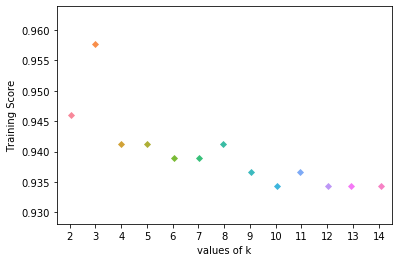

In [49]:
### Plotting the traing and test scores
ax=sns.stripplot(K,training,marker='D');
ax.set(xlabel='values of k',ylabel='Training Score')
plt.show()

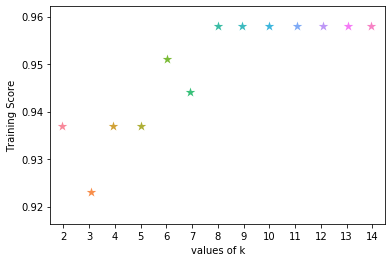

In [54]:
ax=sns.stripplot(K,test,marker='*',s = 10);
ax.set(xlabel='values of k',ylabel='Training Score')
plt.show()

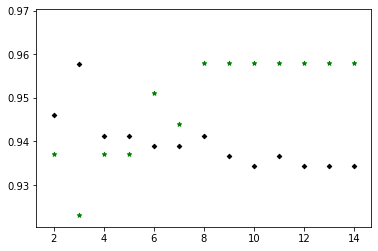

In [56]:
#Overlapping the scatter plots
plt.scatter(K, training, color ='k',marker='D',s = 10)
plt.scatter(K, test, color ='g',marker='*',s = 20)
plt.show()

In [ ]:
# The optimum value of "k" for the model is 5